# Изоляционный лес
Перейдём к многомерным данным. Познакомимся с другим алгоритмом поиска аномалий — изоляционным лесом (англ. isolation forest).

### Это ансамблевый метод. Поэтому, как и в случайном лесу, его оценки строятся на усреднённых оценках множества деревьев решений. В узлах деревьев находятся решающие правила. Они определяют, к какой ветви отнести объект. 

#### Изоляционный лес основан на том, что аномальные объекты можно изолировать от остальных небольшим количеством решающих правил.

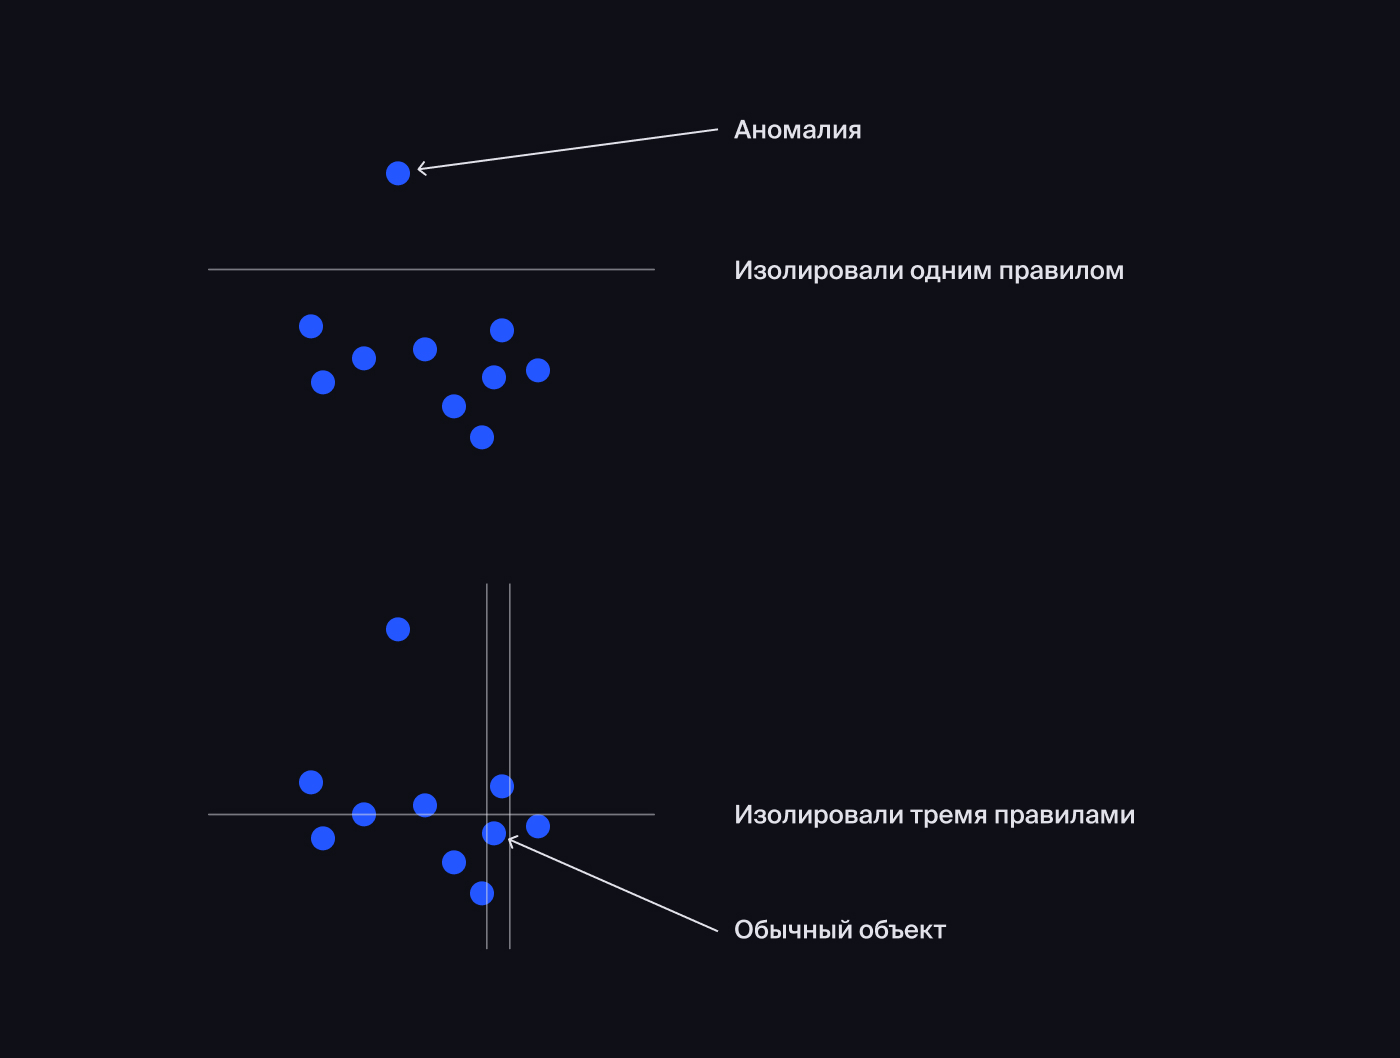

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/sales.csv')

#### Создадим модель. Пропишем количество деревьев в параметре n_estimators. Чем их больше, тем точнее результаты:

In [22]:
isolation_forest = IsolationForest(n_estimators=100)

#### Для поиска аномалий в одномерных данных преобразуем df['Sales'] в двухмерный массив:

In [23]:
sales = df['Sales'].values.reshape(-1, 1)

Выбор аномалий по одному признаку не даст представления обо всём датасете. Изоляционный лес найдёт выбросы по нескольким признакам. 
Например, объединим данные о продажах и прибыли. Здесь дополнительные преобразования не нужны.

In [24]:
data = df[['Sales', 'Profit']]

In [9]:
isolation_forest.fit(data)

IsolationForest()

Вызовом функции decision_function() (англ. «принятие решений») узнаем, как модель оценила объекты:

In [10]:
anomaly_scores = isolation_forest.decision_function(data)

Оценки аномальности находятся в промежутке от -0.5 до 0.5. Чем ниже оценка, тем выше вероятность того, что перед вами аномалия.
Чтобы посчитать количество аномалий, вызовом функции predict() классифицируем объекты на нормальные и выбросы. Если объект получит класс «1», объект нормальный; если «-1» — перед вами выброс.

In [12]:
estimator = isolation_forest.predict(data)

Если оценки аномальности не нужны, функцией fit_predict() можно сразу обучить модель и получить классификацию:

In [13]:
estimator = isolation_forest.fit_predict(data)

### Обучите модель изоляционного леса и вычислите количество аномалий по признакам:
- продаж df['Sales'];
- прибыли df['Profit'].

Определите, какие объекты — выбросы, и запишите их в переменной outliers.

In [18]:
data = df[['Sales', 'Profit']]

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data)

In [19]:
predictions = isolation_forest.fit_predict(data)
outliers = list(predictions[predictions==-1])
print("Количество аномалий: ", len(outliers))

Количество аномалий:  1039


### Изоляционный лес показал аномальных случаев в два раза меньше.